# Predicting the rank of Starcraft II players

**Ethan Shapiro**

## Summary of Findings

----
### Table of Contents

- [Summary of Findings](#summary-of-findings)
- [Feature Cleaning and Missingness](#feature-cleaning-and-missingness)
- [EDA](#eda)
- [All Ranks Models](#all-ranks-models)
- [High Rank Models](#high-rank-models)

----

----
### Introduction
----

**My Questions:** Can we predict a Starcraft player's rank based on their past ranked performance? If so, what information is useful and or will be useful to collect for future prediction?

**Type of Prediction Problem:** We're doing a multiclass classification on the player's rank.

**Response Variable:** League Index (Ranks 1-8)

Finding a solution to these problems I see could help us a few ways:

*From a gamer maker perspective*
1. Placing veteran players in the new ranked season
2. Placing new players into their first ranked league
3. Working in conjunction with another model to adjust ranks (ranked reset, rank inflation adjustments, etc.)

*From an esports organization perspective*
1. Understanding what is important to be a higher tier player to help our player's improve 
2. Helping our player's find out which skills they are underperforming at 
3. Seeing which recruits or players that could potentially be the next professional player

**Metric:** I chose accuracy for evaluating the model because we want to weigh false positives and false negatives equally in our outcomes. However, I also evaluated a second model based on precision due to class imbalances.

---
### Cleaning and Feature Selection
---

All of the following columns contained missing values encoded as '?'.

Although I removed all of these columns, I also advise whether I would attempt to imput them and if I would, how I advise doing so.

 - Age
   - Based on my EDA, Age had no obvious trend with our target so I removed it.
 - HoursPerWeek
   - Although this column had a small linear correlation with our target, I chose to remove it because it wasn't present for any of the professional league and therefore it would be difficult to compute based on our League.
      - If I were to attempt to impute the values, I would try to build an extremely accurate model for the HoursPerWeek based off of the other columns. There is one missing value for a League 5 player, so for that I would consider mean imputation also based on their age. I imagine that player's of similar age within the rank player for similar amounts of time.
 - TotalHours
   - This column had a smaller linear correlation than HoursPerWeek while encoding similar data, so I would remove it even if it wasn't containing missing values.

I also removed the following column:
- GameID
   - After EDA, it was clear that League 8 GameIDs of were only 10,000+. Therefore, knowing the GameID leaks information to our model.
 
Not knowing a lot about the game, I didn't engineer any features. If I knew more about the game and had a chance to speak with EG players and staff, I would definitely look into engineering some features.

----
### EDA
----
I chose to explore the top 5 most linearly correlated features with the target. I also explored the target with regards to two features together.

The important item to note is that while these features show trends with our target, each individually don't seperate the classes in our target. Combining any two combinations also doesn't fully seperate them. It's possible our model will find a way to seperate classes.

The following three features have a positive trend as League Increases.
- **APM:**
    - The distribution of Actions Per Minute steadily increase as the League increases.
    - The width of each distribution within each League seems to widen when we get to League 8 (pros) as well.
    - There are many large outliers, but no extremely small outliers. This leads me to believe these players might be 

- **AssignToHotkeys**
    - The number of units or buildings Assigned To Hotkeys steadily increases as we move up in ranks.
    - The width of each distribution within each League stays increases as we increase rank.

- **NumberOfPACs**
    - The distribution of Number of Perception Action Cycles steadily increase as the League increases.
    - The width of each distribution within each League stays mostly the same as we increase rank.

The following two features have a negative trend as League Increases.

- **ActionLatency:**
    - The distribution of Action Latency steadily decreases as the League increases.
    - The width of each distribution within each League also gets narrower as we move up in ranks.

- **GapBetweenPACs:**
    - The distribution of the Gap Between Perception Action Cycles steadily decreases as the League increases.
    - The width of each distribution within each League also gets narrower as we move up in ranks.


----
### All Rank Model
----
I chose various models and tuned them using Grid Search 5-fold Cross Validation. The best model turned out to be a Random Forests Classifier.

**Best Model**
- **Random Forest**
    - Train Accuracy: 100%
    - Test Accuracy: ~41.53%

**Other Models**
- **Logistic Regression Classification**
    - Train Accuracy: ~42.75%
    - Test Accuracy: ~38.88%
- **Gradient Boosted Regression**
    - Train Accuracy: 100.0%
    - Test Accuracy: ~39.47%
- **K Nearest Neighbors Classifier**
    - Train Accuracy: 100.0%
    - Test Accuracy: ~30.49%
- **Decisicon Tree Classifier**
    - Train Accuracy: 100.0%
    - Test Accuracy: ~30.49%
- **Support Vector Classifier**
    - Train Accuracy: 30.04
    - Test Accuracy: 28.87
 
I believe this model is ok because it does do better than randomly guessing an outcome 1 out of 8 classes (which would be ~12.5%).<br>
However, I would never use this model because it doesn't do nearly well enough to be trustworthy.

----
### High-Tier Model
----
I chose to make a second set of models focusing on the higher tier players, Leagues 6-8. I tuned them using **Grid Search 5-fold Cross Validation**. The best model turned out, again, to be a **Random Forests Classifier**.

**Best Model**
- **Random Forest**
    - Train Accuracy: 100%
    - Test Accuracy: ~41.53%
    - **Test Precision:** 
        - League 6: 100%
        - League 7: 0%
        - League 8: 50%

**Other Models**
- **Logistic Regression Classification**
    - Train Accuracy: ~42.75%
    - Test Accuracy: ~38.88%
- **Gradient Boosted Regression**
    - Train Accuracy: 100.0%
    - Test Accuracy: ~39.47%
- **K Nearest Neighbors Classifier**
    - Train Accuracy: 100.0%
    - Test Accuracy: ~30.49%
- **Decisicon Tree Classifier**
    - Train Accuracy: 100.0%
    - Test Accuracy: ~30.49%
- **Support Vector Classifier**
    - Train Accuracy: 30.04
    - Test Accuracy: 28.87

The best hyperparameters after performing **Grid Search 5-fold Cross Validation** on **80%** of the data was: 
 - max_depth: 5
 - n_estimators: 100

At first glance, this model is clearly a lot better than our all rank model. However, after knowing that the data is skewed, 80% from League 6 and 10% each from League 7 and 8, I switched my evaluation metric to precision. This revealed that the model performed 100% accurately for League 6, but only 50% correct for League 8 and 0% correct for League 7. Clearly this is due to a data imbalance, so with more data I believe the model can perform much better.

---
## Imports

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings('ignore')

----
## Feature Cleaning and Missingness
----
Here, I'll explain why I removed particular features and how I dealt with missingness in the data.

We were trying to predict: **LeagueIndex**

With that multi-class classification objective in mind, I **removed** these features:
 - **GameID**
   - Knowing a GameID is great than 10,000 leaks information into the model to identify Professional Players (League Index 8).
   - We want to identify a player's rank based off of their skills, not a unique ID.
 - **Age**
   - The age of the player didn't give any information on the player's rank, so we can simply remove it.
   - This also solves a problem with having missing values for only rank 8, which makes it hard to impute good values.
 - **TotalHours**
   - Knowing the total hours a player has didn't give us good insight into their rank.
   - All of rank 8 players are missing this entry which would make it hard to impute good values.
   - The 'HoursPerWeek' feature did a better job of capturing the amount of hours played with regards to player rank.
  - **HoursPerWeek**
   - Although this metric did show some correlation to our target, I removed it because of a two reasons:
      1. All of the values for League Index 8 are missing, so it would be hard to impute unbiased values and also impossible to use basic metrics (mean, etc.)
      2. Imputing a filler value will introduce bias
   - **How I could attempt to impute them with more time**
      - League Index 8 missingness:
        - Attempting to build a model between HoursPerWeek and other features to impute the values
      - League Index 5 missingness:
        - Within the League Index 5 entries, I would use the Age of the player to impute the mean
----

An initial observation is that all of the columns are numeric and at vastly different scales. When using different models or techniques to explore the data I'll think about standardizing the data.

In [69]:
# Read in the data
df = pd.read_csv('starcraft_player_data.csv')
df.head(1)

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.718,0.003515,0.00022,7,0.00011,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.0


It appears that no NaN values are present in the data, but we'll take a closer look to see if missingness presents itself in other ways.

In [70]:
# See if we have any missing values
df.isna().sum()

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

In [71]:
# Seems to be no missing values, but let's take a look at our column types to find any "hidden" missingness
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

We expect the Age, Hours per week, and Total Hours to be numeric types, so let's check those columns to see if anything is out of place

In [72]:
# Age, HoursPerWeek, and TotalHours have ?'s in place for missing values
unique_ages = df['Age'].unique()
non_numeric_ages = [not x.isnumeric() for x in unique_ages]
print(f"Non-numeric entries in 'Age': {unique_ages[non_numeric_ages]}")
num_non_numeric_entries = df[df['Age'].isin(unique_ages[non_numeric_ages])].shape[0]
print(f"Number of Ages with '?': {num_non_numeric_entries}")
print()

unique_hrsperweek = df['HoursPerWeek'].unique()
non_numeric_hrsperweek = [not x.isnumeric() for x in unique_hrsperweek]
print(f"Non-numeric entries in 'HoursPerWeek': {unique_hrsperweek[non_numeric_hrsperweek]}")
num_non_numeric_entries = df[df['HoursPerWeek'].isin(unique_hrsperweek[non_numeric_hrsperweek])].shape[0]
print(f"Number of HoursPerWeek with '?': {num_non_numeric_entries}")
print()

unique_totalhrs = df['TotalHours'].unique()
non_numeric_totalhrs = [not x.isnumeric() for x in unique_totalhrs]
num_non_numeric_entries = df[df['TotalHours'].isin(unique_totalhrs[non_numeric_totalhrs])].shape[0]
print(f"Non-numeric entries in 'TotalHours': {unique_totalhrs[non_numeric_totalhrs]}")
print(f"Number of TotalHours with '?': {num_non_numeric_entries}")
print()


Non-numeric entries in 'Age': ['?']
Number of Ages with '?': 55

Non-numeric entries in 'HoursPerWeek': ['?']
Number of HoursPerWeek with '?': 56

Non-numeric entries in 'TotalHours': ['?']
Number of TotalHours with '?': 57



Replace '?' with NaN

In [73]:
df.loc[:, ['Age', 'HoursPerWeek', 'TotalHours']] = df[['Age', 'HoursPerWeek', 'TotalHours']].apply(lambda x: x.replace('?', np.NaN).astype(np.float64))

# we can verify we replaced the '?'s correctly
df[['Age', 'HoursPerWeek', 'TotalHours']].isna().sum()

Age             55
HoursPerWeek    56
TotalHours      57
dtype: int64

I'll convert the LeagueIndex column to a categorical type

In [74]:
df['LeagueIndex'] = df['LeagueIndex'].astype('category')

Before we consider removing these rows/columns, let's explore each of them to determine whether they explain anything about our target.

First, we we'll take a look at the distribution of missingness among our target variable, League Index.

In [75]:
df[df['Age'].isna()]['LeagueIndex'].value_counts()

LeagueIndex
8    55
1     0
2     0
3     0
4     0
5     0
6     0
7     0
Name: count, dtype: int64

The missing ages are all from the League 8, which means that the missingness is likely Not Missing At Random (NMAR). It was likely left out by choice during the data collection process and therefore will probably be absent from future data collection processes.

Before I completely remove Age column, I'll take a look at the distribution of Age in terms of the player's rank. If there isn't any significant trend, it's safe to say removing the Age column won't affect the model. 

Below, we can clearly see that there is no distinct trend for Age in regards to LeagueIndex, so we'll go ahead and remove the age column.

<Axes: xlabel='LeagueIndex', ylabel='Age'>

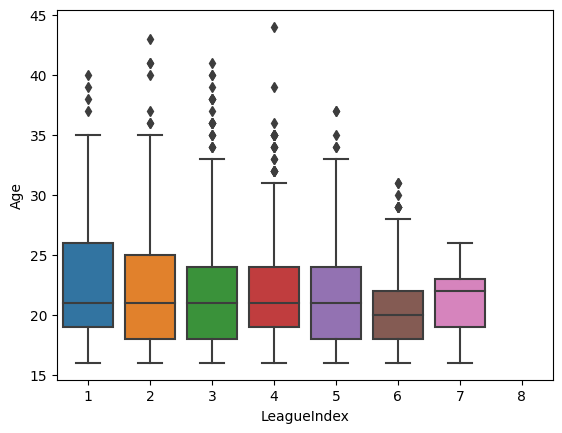

In [76]:
sns.boxplot(df, x='LeagueIndex', y='Age')

In [77]:
df = df.drop(['Age'], axis=1)

Next, we'll take a look at the 'HoursPerWeek' column and how that relates to our player's rank.

Below, we can see that the mean 'HoursPerWeek' spent on the game steadily increases as the player's rank increases.

In [78]:
df.groupby(['LeagueIndex'])[['HoursPerWeek']].agg(['min', 'max', 'mean'])

HoursPerWeek                  
                     min    max       mean
LeagueIndex                               
1                    2.0   70.0  13.125749
2                    2.0   72.0   13.29683
3                    2.0   80.0  13.949367
4                    2.0   96.0  14.022195
5                    2.0   96.0  16.183851
6                    0.0  168.0  21.088567
7                    6.0   98.0  31.714286
8                    NaN    NaN        NaN

Let's look at how each of our features is linearly correlated with our player's ranks below.

In terms of our columns with missing data, we can see that 'TotalHours' doesn't seem to have a strong linear correlation with LeagueIndex. We'll drop this column because it probably won't give us good insight into the player's ranks that we couldn't get from other columns.

On the other hand, 'HoursPerWeek' has a small correlation with 'LeagueIndex', so we'll see if there is a way to impute the data later.

In [79]:
correlation_vals = df.corr().loc[:, ['LeagueIndex']].apply(lambda x: np.round(x, 2)).reset_index()

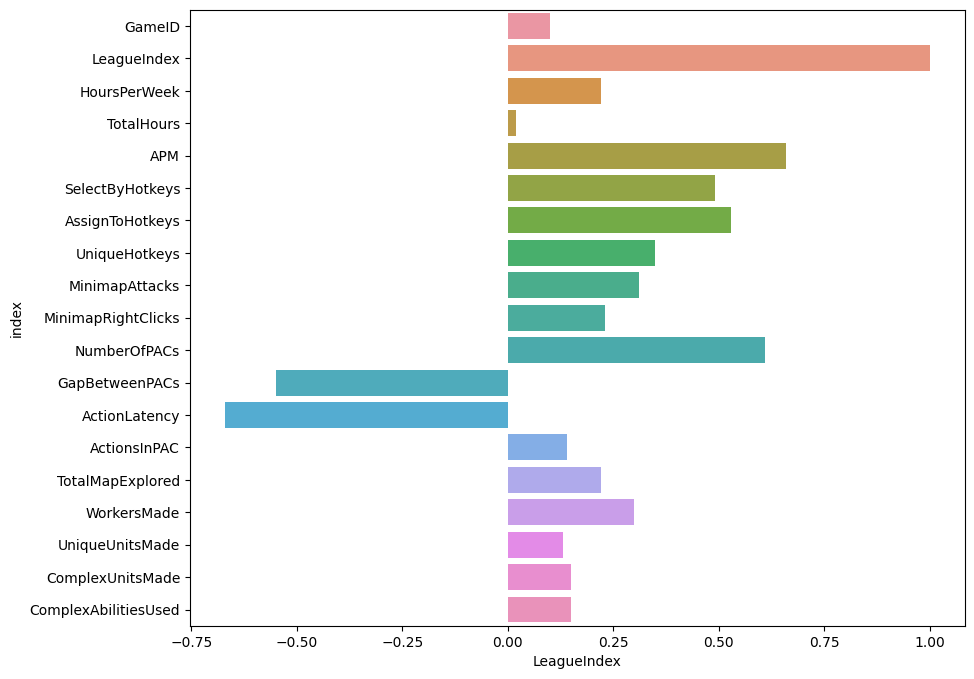

In [80]:
plt.figure(figsize=(10, 8))
sns.barplot(correlation_vals, x='LeagueIndex', y='index')
plt.show()

In [81]:
df = df.drop(['TotalHours'], axis=1)

The 'HoursPerWeek' is missing for every entry of League Index 8 and one for League Index 5. We'll remove this feature as well because I would need more time to impute good values.

In [82]:
df[df['HoursPerWeek'].isna()]['LeagueIndex'].value_counts()

LeagueIndex
8    55
5     1
1     0
2     0
3     0
4     0
6     0
7     0
Name: count, dtype: int64

In [83]:
df = df.drop(['HoursPerWeek', 'GameID'], axis=1)

----

## EDA

----

Below, I explore the top 5 linearly correlated features using boxplots with some more analysis. 

The important item to note is that while these features show trends with our target, each individually don't seperate the classes in our target. Combining any two combinations also doesn't fully seperate them. It's possible our model will find a way to seperate classes.

The following three features have a positive trend as League Increases.
- **APM:**
    - The distribution of Actions Per Minute steadily increase as the League increases.
    - The width of each distribution within each League seems to widen when we get to League 8 (pros) as well.
    - There are many large outliers, but no extremely small outliers. This leads me to believe these players might be 

- **AssignToHotkeys**
    - The number of units or buildings Assigned To Hotkeys steadily increases as we move up in ranks.
    - The width of each distribution within each League stays increases as we increase rank.

- **NumberOfPACs**
    - The distribution of Number of Perception Action Cycles steadily increase as the League increases.
    - The width of each distribution within each League stays mostly the same as we increase rank.

The following two features have a negative trend as League Increases.

- **ActionLatency:**
    - The distribution of Action Latency steadily decreases as the League increases.
    - The width of each distribution within each League also gets narrower as we move up in ranks.

- **GapBetweenPACs:**
    - The distribution of the Gap Between Perception Action Cycles steadily decreases as the League increases.
    - The width of each distribution within each League also gets narrower as we move up in ranks.



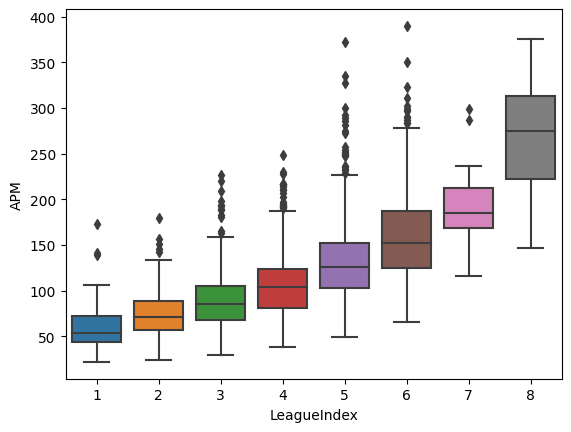

In [84]:
sns.boxplot(df, y='APM', x='LeagueIndex')
plt.show()

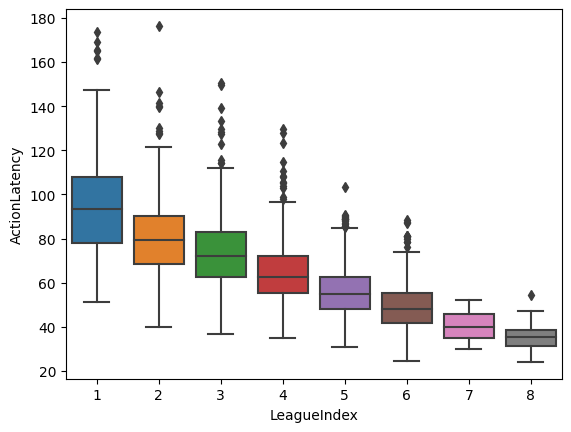

In [85]:
sns.boxplot(df, y='ActionLatency', x='LeagueIndex')
plt.show()

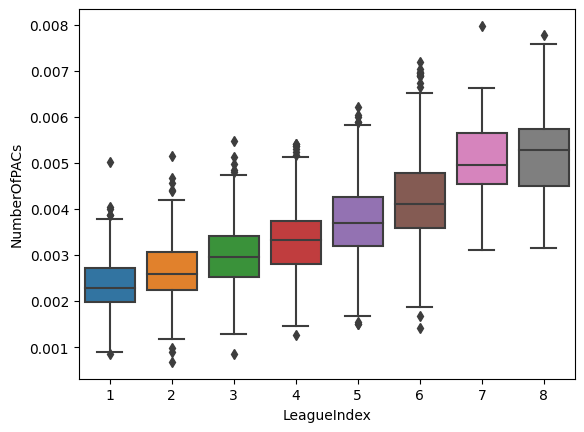

In [86]:
sns.boxplot(df, y='NumberOfPACs', x='LeagueIndex')
plt.show()

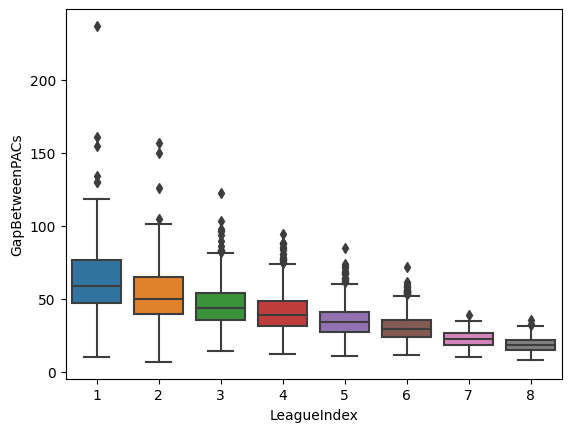

In [87]:
sns.boxplot(df, y='GapBetweenPACs', x='LeagueIndex')
plt.show()

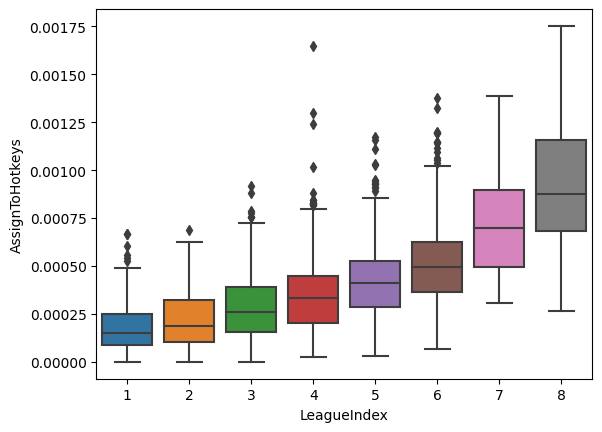

In [88]:
sns.boxplot(df, y='AssignToHotkeys', x='LeagueIndex')
plt.show()

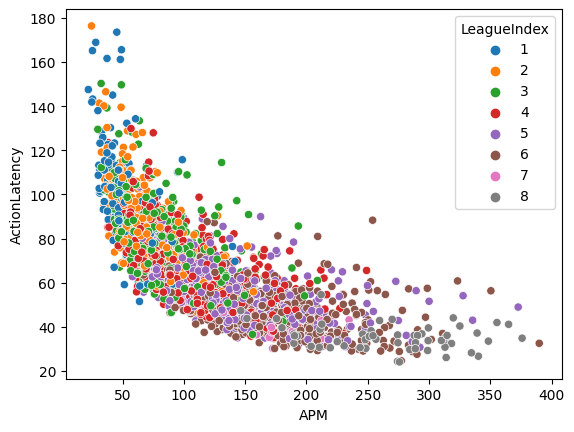

In [89]:
sns.scatterplot(df, y='ActionLatency', x='APM', hue='LeagueIndex')
plt.show()

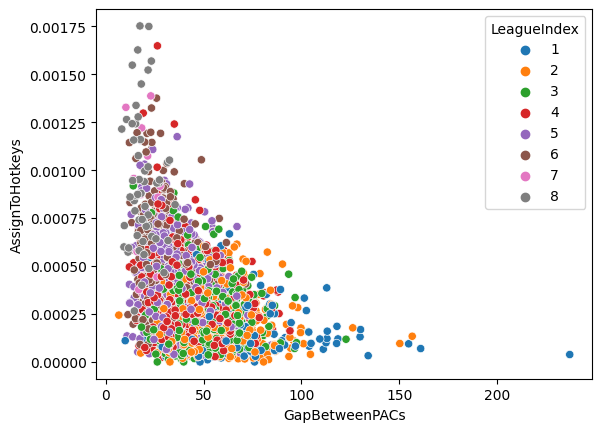

In [90]:
# It's important to note that the scale of 'AssignToHotkeys' is way smaller than 'GapBetweenPACs'
sns.scatterplot(df, y='AssignToHotkeys', x='GapBetweenPACs', hue='LeagueIndex')
plt.show()

----

## All Ranks Models

----

I chose various models and tuned them using Grid Search Cross Validation. The best model turned out to be a Random Forests Classifier. It didn't perform extremely well, but it did better than making a random guess (with 8 classes that's 12.5% correct on average when guessing).
<br/>
It makes sense that the tree algorithms performed well because they are:
1. Robust to scale differences which are present in this dataset (features in 100s to features in 0.001s)
2. Good at finding non-linear decision boundaries which we observed in the above EDA.


**Best Model**
- **Random Forest**
    - Train Accuracy: 100%
    - Test Accuracy: ~41.53%

**Other Models**
- **Logistic Regression Classification**
    - Train Accuracy: ~42.75%
    - Test Accuracy: ~38.88%
- **Gradient Boosted Regression**
    - Train Accuracy: 100.0%
    - Test Accuracy: ~39.47%
- **K Nearest Neighbors Classifier**
    - Train Accuracy: 100.0%
    - Test Accuracy: ~30.49%
- **Decisicon Tree Classifier**
    - Train Accuracy: 100.0%
    - Test Accuracy: ~30.49%
- **Support Vector Classifier**
    - Train Accuracy: 30.04
    - Test Accuracy: 28.87

In [91]:
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Param Tuning & Data Prep
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

# metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [92]:
# Define the classifiers and their corresponding parameter grids for grid search
classifiers_params = [
    {
        'classifier': LogisticRegression(max_iter=50_000), # max_iter suppresses convergence warning
        'params': {
            'C': [0.1, 1, 10],
            'penalty': ['l1', 'l2'],
            'multi_class': ['ovr', 'multinomial']
        }
    },
    {
        'classifier': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200, 500],
            'max_depth': [None, 5, 10, 15, 20]
        }
    },
    {
        'classifier': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [3, 5, 10]
        }
    },
    {
        'classifier': SVC(),
        'params': {
            'C': [0.01, 1, 10],
            'kernel': ['rbf'],
            'decision_function_shape': ['ovr', 'ovo']
        }
    },
    {
        'classifier': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 11, 13, 15],
            'weights': ['uniform', 'distance']
        }
    },
    {
        'classifier': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 5, 10]
        }
    },
    {'classifier': GaussianNB(),
     'params': {
     }}
]

For the baseline models, I'm going to dorp all of the columns containing missing values. In the final model, I'll impute values into the 'HoursPerWeek'.

In [93]:
# Define the feature matrix and target
X = df.drop(['LeagueIndex'], axis=1) 
y = df['LeagueIndex']

In [95]:
@ignore_warnings(category=ConvergenceWarning)
def perform_experiments(X_train, X_test, y_train, y_test) -> list:
    """
    Performs various classification models on the given test and train datasets.
    Prints each model's train and test accuracies.
    
    Returns a list of the best models.

    Args:
        X_train (_type_): _description_
        X_test (_type_): _description_
        y_train (_type_): _description_
        y_test (_type_): _description_

    Returns:
        list: _description_
    """
    best_models = []
    for classifier in classifiers_params:
        # perform gridsearch for the best params
        grid_search = GridSearchCV(classifier['classifier'], classifier['params'], cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        # save the best model
        best_model = grid_search.best_estimator_
        best_models.append(best_model)

        # Evaluate the best model on train and test sets
        train_accuracy = accuracy_score(y_train, best_model.predict(X_train))
        test_accuracy = accuracy_score(y_test, best_model.predict(X_test))

        # Print accuracy scores
        print("Classifier:", best_model.__class__.__name__)
        print("Train Accuracy:", 100 * np.round(train_accuracy, 4))
        print("Test Accuracy:", 100 * np.round(test_accuracy, 4))
        print()
    return best_models


In [96]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Perform grid search for each classifier
best_models_main = perform_experiments(X_train, X_test, y_train, y_test)

Classifier: LogisticRegression
Train Accuracy: 39.18
Test Accuracy: 39.76

Classifier: RandomForestClassifier
Train Accuracy: 91.67999999999999
Test Accuracy: 40.35

Classifier: GradientBoostingClassifier
Train Accuracy: 79.23
Test Accuracy: 40.35

Classifier: SVC
Train Accuracy: 38.769999999999996
Test Accuracy: 38.73

Classifier: KNeighborsClassifier
Train Accuracy: 100.0
Test Accuracy: 34.02

Classifier: DecisionTreeClassifier
Train Accuracy: 43.96
Test Accuracy: 38.440000000000005

Classifier: GaussianNB
Train Accuracy: 38.07
Test Accuracy: 38.59



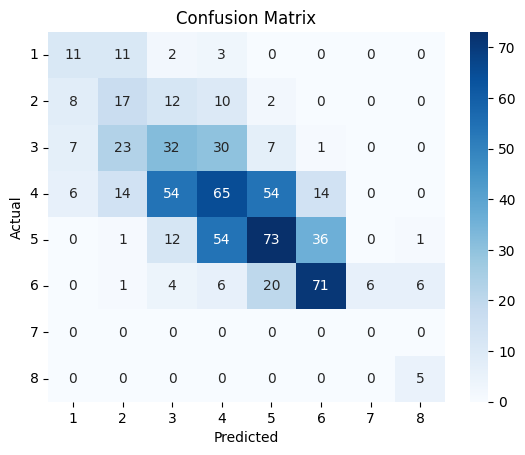

In [97]:
# We cam see that as we go up in ranks it gets extremely hard to discern who is who purely based off of these statistics
# Our mode performs the best at classifying Leagues 4-6 and does worse on either of the ends.
random_forest_mdl = best_models_main[1]

rf_conf_matrix = confusion_matrix(random_forest_mdl.predict(X_test), y_test)
# Create a heatmap for the confusion matrix
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues")

# Add labels, title, and axis ticks
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.xticks(np.arange(8) + 0.5, labels=np.unique(df['LeagueIndex']))
plt.yticks(np.arange(8) + 0.5, labels=np.unique(df['LeagueIndex']), rotation=0)
plt.show()

----

## High Rank Models

----

Taking the lense of an Esports organization, I would adjust the model to focus on the higher tier players (League Index 6 to 8 or Master to Professional). Knowing how to differentiate between lower tier players doesn't seem to be helpful to a professional team, but knowing who could potentially be a professional player would be. This could be made into a tool to help with obtaining and training EG's next Starcraft II players.

I chose various models and tuned them using Grid Search Cross Validation. The best model turned out to be a Random Forests Classifier.

**Best Model**
- **Random Forest**
    - Train Accuracy: 100%
    - Test Accuracy: ~41.53%

**Other Models**
- **Logistic Regression Classification**
    - Train Accuracy: ~42.75%
    - Test Accuracy: ~38.88%
- **Gradient Boosted Regression**
    - Train Accuracy: 100.0%
    - Test Accuracy: ~39.47%
- **K Nearest Neighbors Classifier**
    - Train Accuracy: 100.0%
    - Test Accuracy: ~30.49%
- **Decisicon Tree Classifier**
    - Train Accuracy: 100.0%
    - Test Accuracy: ~30.49%
- **Support Vector Classifier**
    - Train Accuracy: 30.04
    - Test Accuracy: 28.87

Below, we can see that there are two features with importances ~0.03. <br> Usually, I would remove them and rerun the models to see if our less complex model performs similarly to our first, but since our model is only 15 features it isn't that complex and I will leave them.

<Axes: >

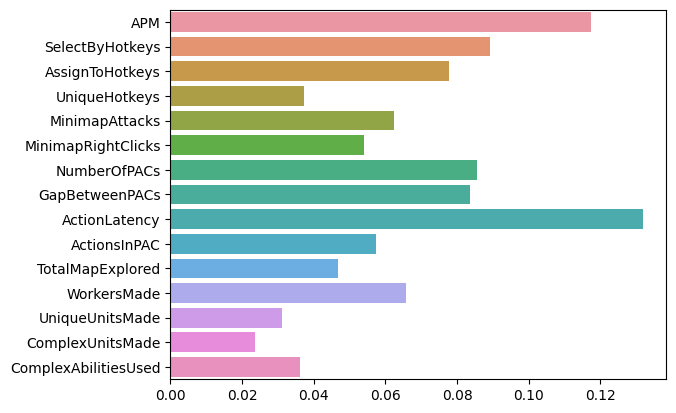

In [25]:
sns.barplot(x=random_forest_mdl.feature_importances_, y=random_forest_mdl.feature_names_in_)

Let's get the high tier dataset and rerun the experiments on those.

In [27]:
high_tier_df = df[df['LeagueIndex'].isin([6, 7, 8])]
high_tier_df['LeagueIndex'].value_counts()

LeagueIndex
6    621
8     55
7     35
1      0
2      0
3      0
4      0
5      0
Name: count, dtype: int64

Although our classes are imbalanced, let's run the models to see how they perform and then I'll decide whether I'll need to address class imbalances.

In [28]:
# Define our new X and y
X_high = high_tier_df.drop(['LeagueIndex'], axis=1) 
y_high = high_tier_df['LeagueIndex']

# Define our new train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_high, y_high, test_size=0.3, random_state=100)

# Perform grid search for each classifier
best_models = perform_experiments(X_train, X_test, y_train, y_test)

Classifier: LogisticRegression
Train Accuracy: 89.94
Test Accuracy: 91.59

Classifier: RandomForestClassifier
Train Accuracy: 94.16
Test Accuracy: 91.59

Classifier: GradientBoostingClassifier
Train Accuracy: 100.0
Test Accuracy: 91.12

Classifier: SVC
Train Accuracy: 89.34
Test Accuracy: 91.12

Classifier: KNeighborsClassifier
Train Accuracy: 88.73
Test Accuracy: 91.59

Classifier: DecisionTreeClassifier
Train Accuracy: 95.17
Test Accuracy: 85.50999999999999

Classifier: GaussianNB
Train Accuracy: 84.31
Test Accuracy: 85.98



Below we can see the test precision for each class. Although the model correctly classifies all League 6 correctly, it's expected since we have a lot more datapoints for League 6. For League 7 our model didn't classify any correctly and only half of the League 8 correctly.

In [29]:
precision_score(best_models[1].predict(X_test), y_test, average=None)

array([1. , 0. , 0.4])

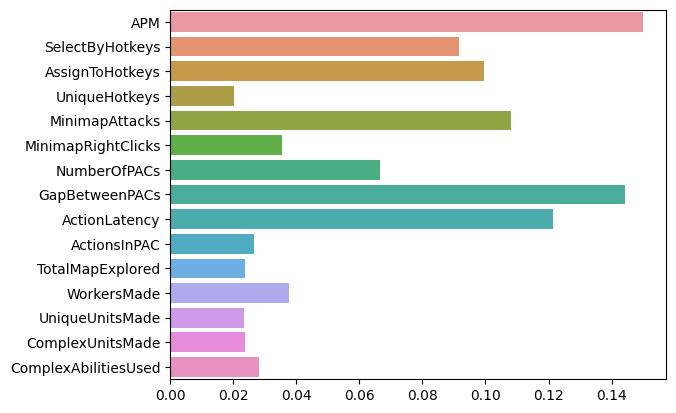

In [33]:
sns.barplot(x=best_models[1].feature_importances_, y=best_models[1].feature_names_in_)
plt.show()

Our accuracies above were great, but we can see that the prediction accuracy within our smaller ranks (7 & 8) didn't have as great for classes 7 or 8.

There are two ways I would address these class imbalances:
1. Weighing the classes in the models higher than the majority class
2. Oversampling or undersampling the majority class

With more time I could try these methods, but tree algorithms (which are performing the best) are robust to class imbalances.

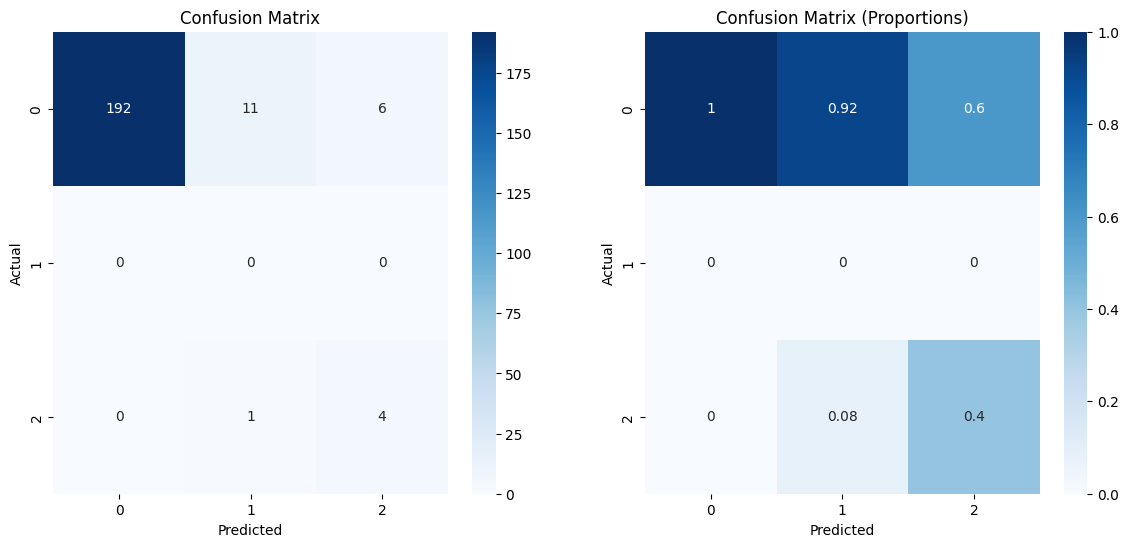

In [32]:
rf_conf_matrix = confusion_matrix(best_models[1].predict(X_test), y_test)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create a heatmap for the confusion matrix
sns.heatmap(rf_conf_matrix, ax=axes[0], annot=True, fmt="d", cmap="Blues")

# Add labels, title, and axis ticks
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
axes[0].set_title("Confusion Matrix")
plt.xticks(np.arange(3) + 0.5, labels=np.unique(y_test))
plt.yticks(np.arange(3) + 0.5, labels=np.unique(y_test), rotation=0)

class_counts = y_test.value_counts()

# Turns the counts into proportion of each class correctly classified
prop_6 = rf_conf_matrix[:, 0] / class_counts[6]
prop_7 = rf_conf_matrix[:, 1] / class_counts[7]
prop_8 = rf_conf_matrix[:, 2] / class_counts[8]
rf_conf_matrix = np.hstack([prop_6, prop_7, prop_8]).reshape((3, 3)).T
rf_conf_matrix = np.round(rf_conf_matrix, 2)

# Create a heatmap for the confusion matrix
sns.heatmap(rf_conf_matrix, ax=axes[1], annot=True, cmap="Blues")

axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
axes[1].set_title("Confusion Matrix (Proportions)")

# show the figure
fig.show()

----

## Model Interpretations

----

### Main Model (All Leagues)

Our main model which included all of the League Indicies 1-8 performed okay. It's likely due to the class imbalance that the model couldn't classify the undersampled leagues as well. There were fairly clear trends in the data that differentiate the performance between ranks. Both in my EDA and model found these trends, so I can imagine that with more data the models would be able to perform a lot better on the test sets.

**Best Model**
- **Random Forest**
    - Train Accuracy: 100%
    - Test Accuracy: ~41.53%

The Random Forest found that the best features to differentiate between the all Leagues was Action Latency followed closely by Actions Per Minute (APM). Therefore, it is clear that the speed at which actions are performed and the number of actions performed is the difference between being a low and high tier player. It's also important to note that the top 5 features relate to that idea. To perform actions quickly, the player would use hotkeys. If the player performs actions quickly, they are likely performing a lot of actions which would increase their APM. For a player to perform many actions, they likely have to switch to different areas of the map to exhaust all possible actions, which would increase the Number of Perception Action Cycles (PACs) and Gap Between PACs. 

**5 Most Important Features**
- ActionLatency: 10.3
- APM: 10.05
- SelectByHotkeys: 8.51
- NumberOfPACs: 8.19
- GapBetweenPACs: 8.16

----

### High-Tier Model (Leagues 6-8)

For the model based on data from League Indicies 6-8 (High-Tier Models), the Random Forest Classifier Achieved 92.06% accuracy on the test sets. Knowing that the data is extremely imbalanced, around 80% of the data points from League 6 and 20% in League 7 and 8, I used precision to get a better idea of how many values we could have classified correctly within each class. Precision showed that although classifying all of League 6 correctly, the model didn't correctly classify any of League 7 correctly and only classified 50% of League 8 values correctly. It's most likely that this performance drop is due to the class imbalance; With more data the model would be able to perform better accross all classes.

**Best High-Tier Model**
- **Random Forest**
    - Train Accuracy: 100.0%
    - Test Accuracy: 92.06%
    - **Test Precision:** 
        - League 6: 100%
        - League 7: 0%
        - League 8: 50%

Within the higher ranks, the most important feature changes to Gap Between Perception Action Cycles (PACs). A PAC is a shift of screen to a new location followed by at least one action. This shows that as you go up in ranks, the players action latency gets more similar, but being able to perform actions in multiple different areas of the game quickly is more important.

**5 Most Important Features**
- GapBetweenPACs: 13.37
- APM: 13.31
- AssignToHotkeys: 11.01
- MinimapAttacks: 10.02
- ActionLatency: 9.83

----

## Advice to Stakeholders

----

With the following hypothetical question in mind:

> Hypothetical: after seeing your work, your stakeholders come to you and say that they <br> can collect more data, but want your guidance before starting. How would you advise <br> them based on your EDA and model results?

I would first suggest we narrow our data collection to just high tier players in Leagues 6-8. As an Esports Organization, we don't care so much about what differentiates a low tier player from a higher tier, but what the difference between a top tier and a professional player. 

I would next offer three tools that could be made to help EG.
1. Using our model, we can see which of our players classified lower than a professional and then see which features caused them to be incorrectly classified. We can then take this information to tell our player's what skills they need to improve to perform better. **NOTE:** For this tool we would need a trustworthy model as close to 100% accuracy as possible.
2. Since our model also gives us importance of different player statistics, I would advise a way to build a tool that can take in our player's statistics to see where our player's fall against other pros. If they are below average, we they can use that knowledge to know where they can improve. This tool is slightly different than the above tool because it analyzes just the statistics without regards for rank. The above tool would be useful if a player is performing significantly below average to understand the overall picture in regards to rank.
3. For recruiting, we can use the model to intake high tier players or potential candidates. Then, if we encounter any players that are not already pros (anyone in League 6 or 7), that get classified as League 8, we might consider that they could be the next EG recruit. **NOTE:** For this tool we would need a trustworthy model as close to 100% accuracy as possible.

Finally, I would suggest the following for what we should try to collect in the future (in addition to the previous data) to support building these possible tools. 

- **InGameRace:** After some research, I found that Starcraft II pros typically focus on one particular race and master it. With my limited knowledge of SC2, I know that the different races have different playstyles. Therefore, some might require more actions, more PACs, etc. This could help our model understand how to rank players that have a lower GapBetweenPACs and yet are still League 8 (pros). Likewise, when evaluating how our players are doing (tool 2), we can subset the data into the race our player mains to get a better idea of how they fall within their in game race rather than a generalization of all races.

- **AverageGameLength:** While I don't think this will be a good statistic for helping our players, I believe it will help our model and be relatively easy to collect. I imagine that the length of the game can help discern between higher tier players. For the Zerg race playstyle, professionals might be able to finish earlier than a typical high tier player. On the contrary, professional games might also be longer because the skill levels are more evenly match and they have a better understanding of the game.

- **HoursPerWeek:** This statistic was missing for all professional players. So although it wasn't used in the previous models, I imagine it will be a tell for who is/isn't a professional player. Even if it doesn't help the model too much, it would be good to know how dedicated the player is and how consistent they are. It's a better statistic than Total Hours played because it shows how consistent they are rather than if they played a lot in the past but aren't as dedicated now.

### Final Thoughts

Overall, I believe that the statistics collected now are good and I would need to do more research into how Starcraft II works and how the different races are played before I could make more suggestions for statistics to collect. I believe that the main drawbacks of our model is simply the lack of data. With at least 500-600 more datapoints on each of the undersampled leagues, I believe our model could achieve significant increases in performance. In the end, the only statistic I wouldn't advise to collect would be 'TotalHours', as I think that information is better captured in the 'HoursPerWeek' feature.
